<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-to-Fit-Grid-Models-to-Data" data-toc-modified-id="How-to-Fit-Grid-Models-to-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How to Fit Grid Models to Data</a></span><ul class="toc-item"><li><span><a href="#Define-Paths-To-Data-and-Models" data-toc-modified-id="Define-Paths-To-Data-and-Models-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Define Paths To Data and Models</a></span></li><li><span><a href="#Add-Available-Grids-to-Test" data-toc-modified-id="Add-Available-Grids-to-Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Add Available Grids to Test</a></span></li><li><span><a href="#Add-Datasets-to-Explore" data-toc-modified-id="Add-Datasets-to-Explore-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Add Datasets to Explore</a></span></li><li><span><a href="#Compute-$\chi_{red}^2$-and-Retrieve-Single-Best-Fit" data-toc-modified-id="Compute-$\chi_{red}^2$-and-Retrieve-Single-Best-Fit-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Compute $\chi_{red}^2$ and Retrieve Single Best Fit</a></span></li><li><span><a href="#Analyze-Single-Best-Fits" data-toc-modified-id="Analyze-Single-Best-Fits-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Analyze Single Best Fits</a></span></li><li><span><a href="#Interpret-Best-Fit" data-toc-modified-id="Interpret-Best-Fit-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Interpret Best Fit</a></span></li></ul></li></ul></div>

# How to Fit Grid Models to Data

Author: Sagnick Mukherjee ([email](samukher@ucsc.edu)/[website](https://sagnickm.github.io/))

Citation: [ERS Team Collab, 2022](add paper link)

In this notebook, we show how to use the `PICASO`-formatted grid models to interpret the WASP-39b data from the Early Release Science Program. 

**Helpful knowledge before running this notebook:**

- [How to use xarray files](https://natashabatalha.github.io/picaso/notebooks/codehelp/data_uniformity_tutorial.html) 
- [Basic PICASO knowledge of how to compute transit spectra](https://natashabatalha.github.io/picaso/notebooks/workshops/ESO2021/ESO_Tutorial.html)

**Need to do before running this notebook**

In order to use this notebook you will have to: 

- [Download and unpack the zenodo grid models](final link)
- [Download the final planet spectrum](final link) 


In [1]:
import numpy as np
import os

import picaso.justdoit as jdi
import picaso.justplotit as jpi
import picaso.analyze as lyz
jpi.output_notebook()

Loading BokehJS ...

## Define Paths To Data and Models

You should have four folders in your `model_dir`: 

1. `cld_free_R=3000_0,6-6um/`: 192 models 
2. `cldy_R=3000_0,6-6um/`: 3840 models 
3. `cld_free_photo_R=3000_0,6-6um/`: 116 models
4. `cldy_photo_R=3000_0,6-6um/`: 580 models 


In [2]:
#should have sub folders similar to above
model_dir = "/Users/nbatalh1/Documents/data/planets/WASP-39b/"
#agnostic to where it is, just make sure you point to the right data file
data_file = os.path.join(model_dir,"w39_prism_firefly_trans_spec_20July2022_v1.txt")

wlgrid_center,rprs_data2,wlgrid_width, e_rprs2 = np.loadtxt(data_file,usecols=[0,1,2,3],unpack=True,skiprows=1)

#for now, we are only going to fit 3-5 um
wh =  np.where(wlgrid_center < 3.0)
wlgrid_center = np.delete(wlgrid_center,wh[0])
wlgrid_width = np.delete(wlgrid_width,wh[0])
rprs_data2 = np.delete(rprs_data2,wh[0])
e_rprs2 = np.delete(e_rprs2,wh[0])
reduction_name = "Firefly"

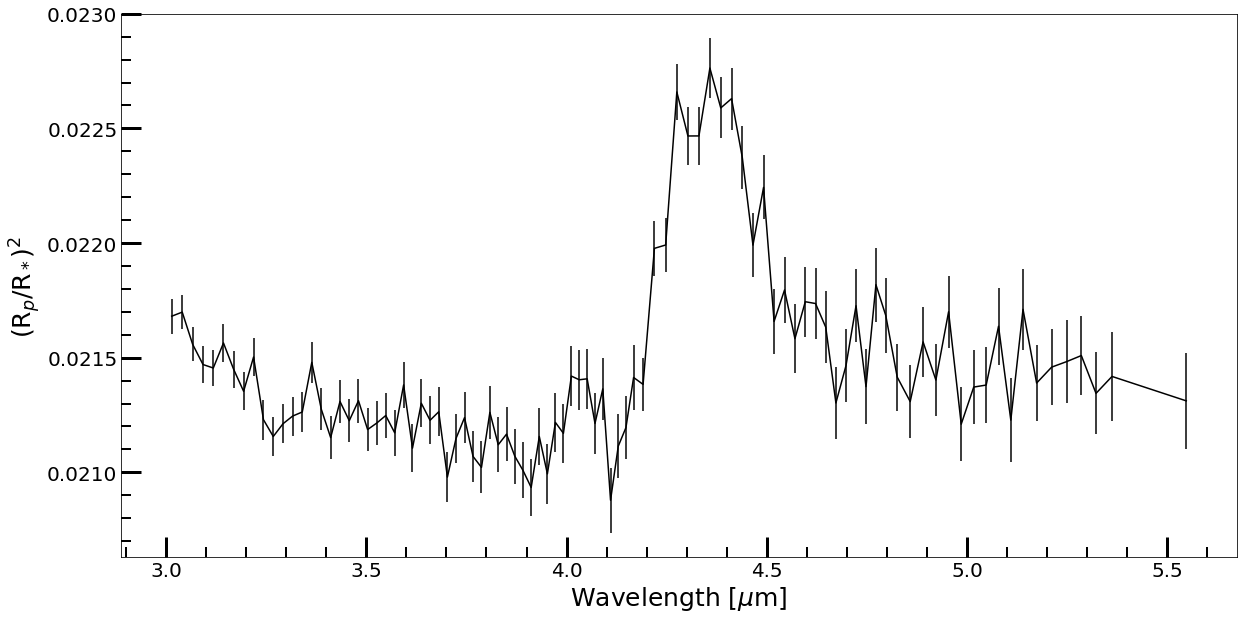

In [3]:
f=jpi.plot_errorbar(wlgrid_center, rprs_data2,e_rprs2, plot_type='matplotlib',
                   plot_kwargs={'ylabel':r'(R$_p$/R$_*$)$^2$'})#plot_type='bokeh' also available
#jpi.show(f) #if using bokeh (note if using bokeh need those key words (e.g. y_axis_label instead of ylabel))

## Add Available Grids to Test

First step will be to load your first grid into the `GridFitter` class. You can do this easily by supplying the function a directory location, and grid name (`grid_name`). 

The only purpose of `grid_name` is in case you add more grids to your `GridFitter` function, it will be easy to keep track of what parameters go with what grid.  

In [4]:
grid_name = "picaso"
location = os.path.join(model_dir,"cld_free_R=3000_0,6-6um")
fitter = lyz.GridFitter(grid_name,location, verbose=True)

Total number of models in grid is 192
For tint in planet_params grid is: [100. 200. 300.]
For heat_redis in planet_params grid is: [0.4 0.5]
For mh in planet_params grid is: [  0.1     0.316   1.      3.162  10.     31.623  50.119 100.   ]
For cto in planet_params grid is: [0.229 0.458 0.687 0.916]


In [5]:
fitter.grid_params['picaso']['planet_params'].keys()

dict_keys(['tint', 'heat_redis', 'mh', 'cto'])

In [6]:
location = os.path.join(model_dir,"cldy_R=3000_0,6-6um")
fitter.add_grid('picaso_cldy', location)#

Total number of models in grid is 3840
For tint in planet_params grid is: [100. 200. 300.]
For heat_redis in planet_params grid is: [0.4 0.5]
For logkzz in planet_params grid is: [ 5.  7.  9. 11.]
For mh in planet_params grid is: [  0.1     0.316   1.      3.162  10.     31.623  50.119 100.   ]
For cto in planet_params grid is: [0.229 0.458 0.687 0.916]
For fsed in cld_params grid is: [ 0.6  1.   3.   6.  10. ]


### Explore the parameters of the grid

In [7]:
fitter.grids #what grids exist

['picaso', 'picaso_cldy']

In [8]:
fitter.overview['picaso']#top level info from the attrs 

{'planet_params': {'rp': 1.279,
  'mp': 0.28,
  'tint': array([100., 200., 300.]),
  'heat_redis': array([0.4, 0.5]),
  'p_reference': 10.0,
  'logkzz': 'Not used in grid.',
  'mh': array([  0.1  ,   0.316,   1.   ,   3.162,  10.   ,  31.623,  50.119,
         100.   ]),
  'cto': array([0.229, 0.458, 0.687, 0.916]),
  'p_quench': 'Not used in grid.',
  'rainout': 'Not used in grid.'},
 'stellar_params': {'rs': 0.932,
  'logg': 4.38933,
  'steff': 5326.6,
  'feh': -0.03,
  'ms': 0.913},
 'cld_params': {'opd': 'Not used in grid.',
  'ssa': 'Not used in grid.',
  'asy': 'Not used in grid.',
  'p_cloud': 'Not used in grid.',
  'haze_eff': 'Not specified in attrs.',
  'fsed': 'Not used in grid.'},
 'num_params': 4}

In [9]:
print(fitter.grid_params['picaso']['planet_params']['tint'][0], #this full list can be cross referened against the file list 
fitter.list_of_files['picaso'][0])
#in this case we can verify against the filename, though that might always not be the case 

100.0 /Users/nbatalh1/Documents/data/planets/WASP-39b/cld_free_R=3000_0,6-6um/profile_eq_planet_100_grav_4.5_mh_+1.5_CO_0.5_sm_0.0486_v_0.4_.nc


## Add Datasets to Explore

In [10]:
fitter.add_data('firefly',wlgrid_center, wlgrid_width, rprs_data2, e_rprs2)

## Compute $\chi_{red}^2$ and Retrieve Single Best Fit

In [11]:
fitter.fit_grid('picaso','firefly')
fitter.fit_grid('picaso_cldy','firefly')

tint
heat_redis
mh
cto
tint
heat_redis
logkzz
mh
cto
fsed


In [12]:
out = fitter.as_dict()
out.keys()

dict_keys(['list_of_files', 'spectra_w_offset', 'rank_order', 'grid_params', 'offsets', 'chi_sqs', 'posteriors'])

In [13]:
### Use rank order to get the top best fit or other parameters
#top 5 best fit models
np.array(out['list_of_files']['picaso']
        )[out['rank_order']['picaso']['firefly']][0:5]

#top 5 best fit chi sqs
np.array(out['chi_sqs']['picaso']['firefly']
        )[out['rank_order']['picaso']['firefly']][0:5]

array([2.02952798, 2.03635343, 2.06456077, 2.08438043, 2.0907829 ])

## Analyze Single Best Fits

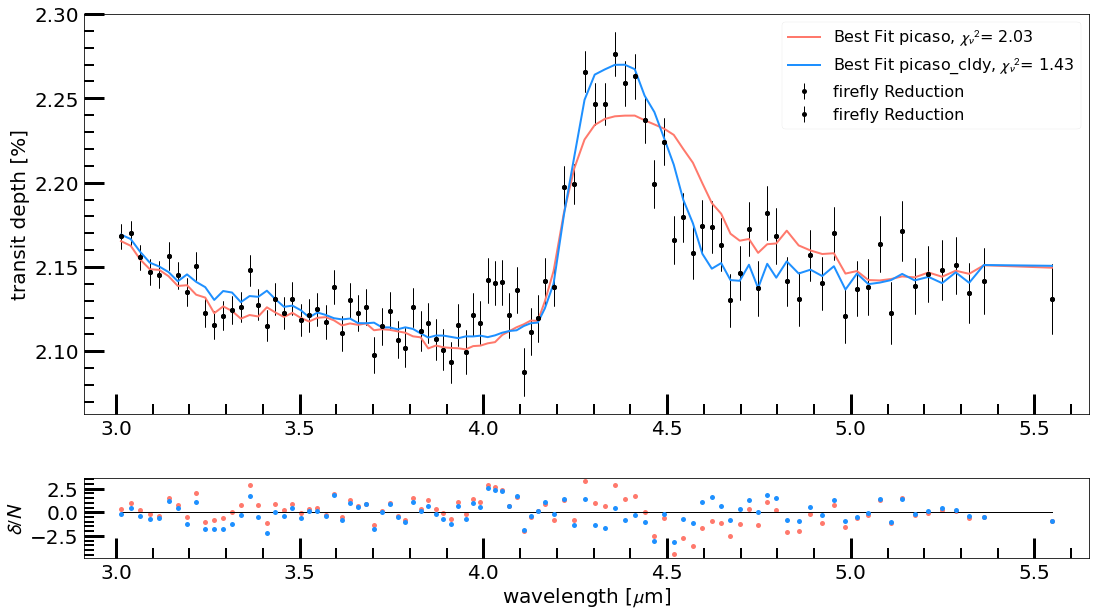

In [16]:
fig,ax = fitter.plot_best_fit(['picaso','picaso_cldy'],'firefly')

In [17]:
best_fit = fitter.print_best_fit('picaso','firefly')

tint=100.0
heat_redis=0.5
mh=100.0
cto=0.229


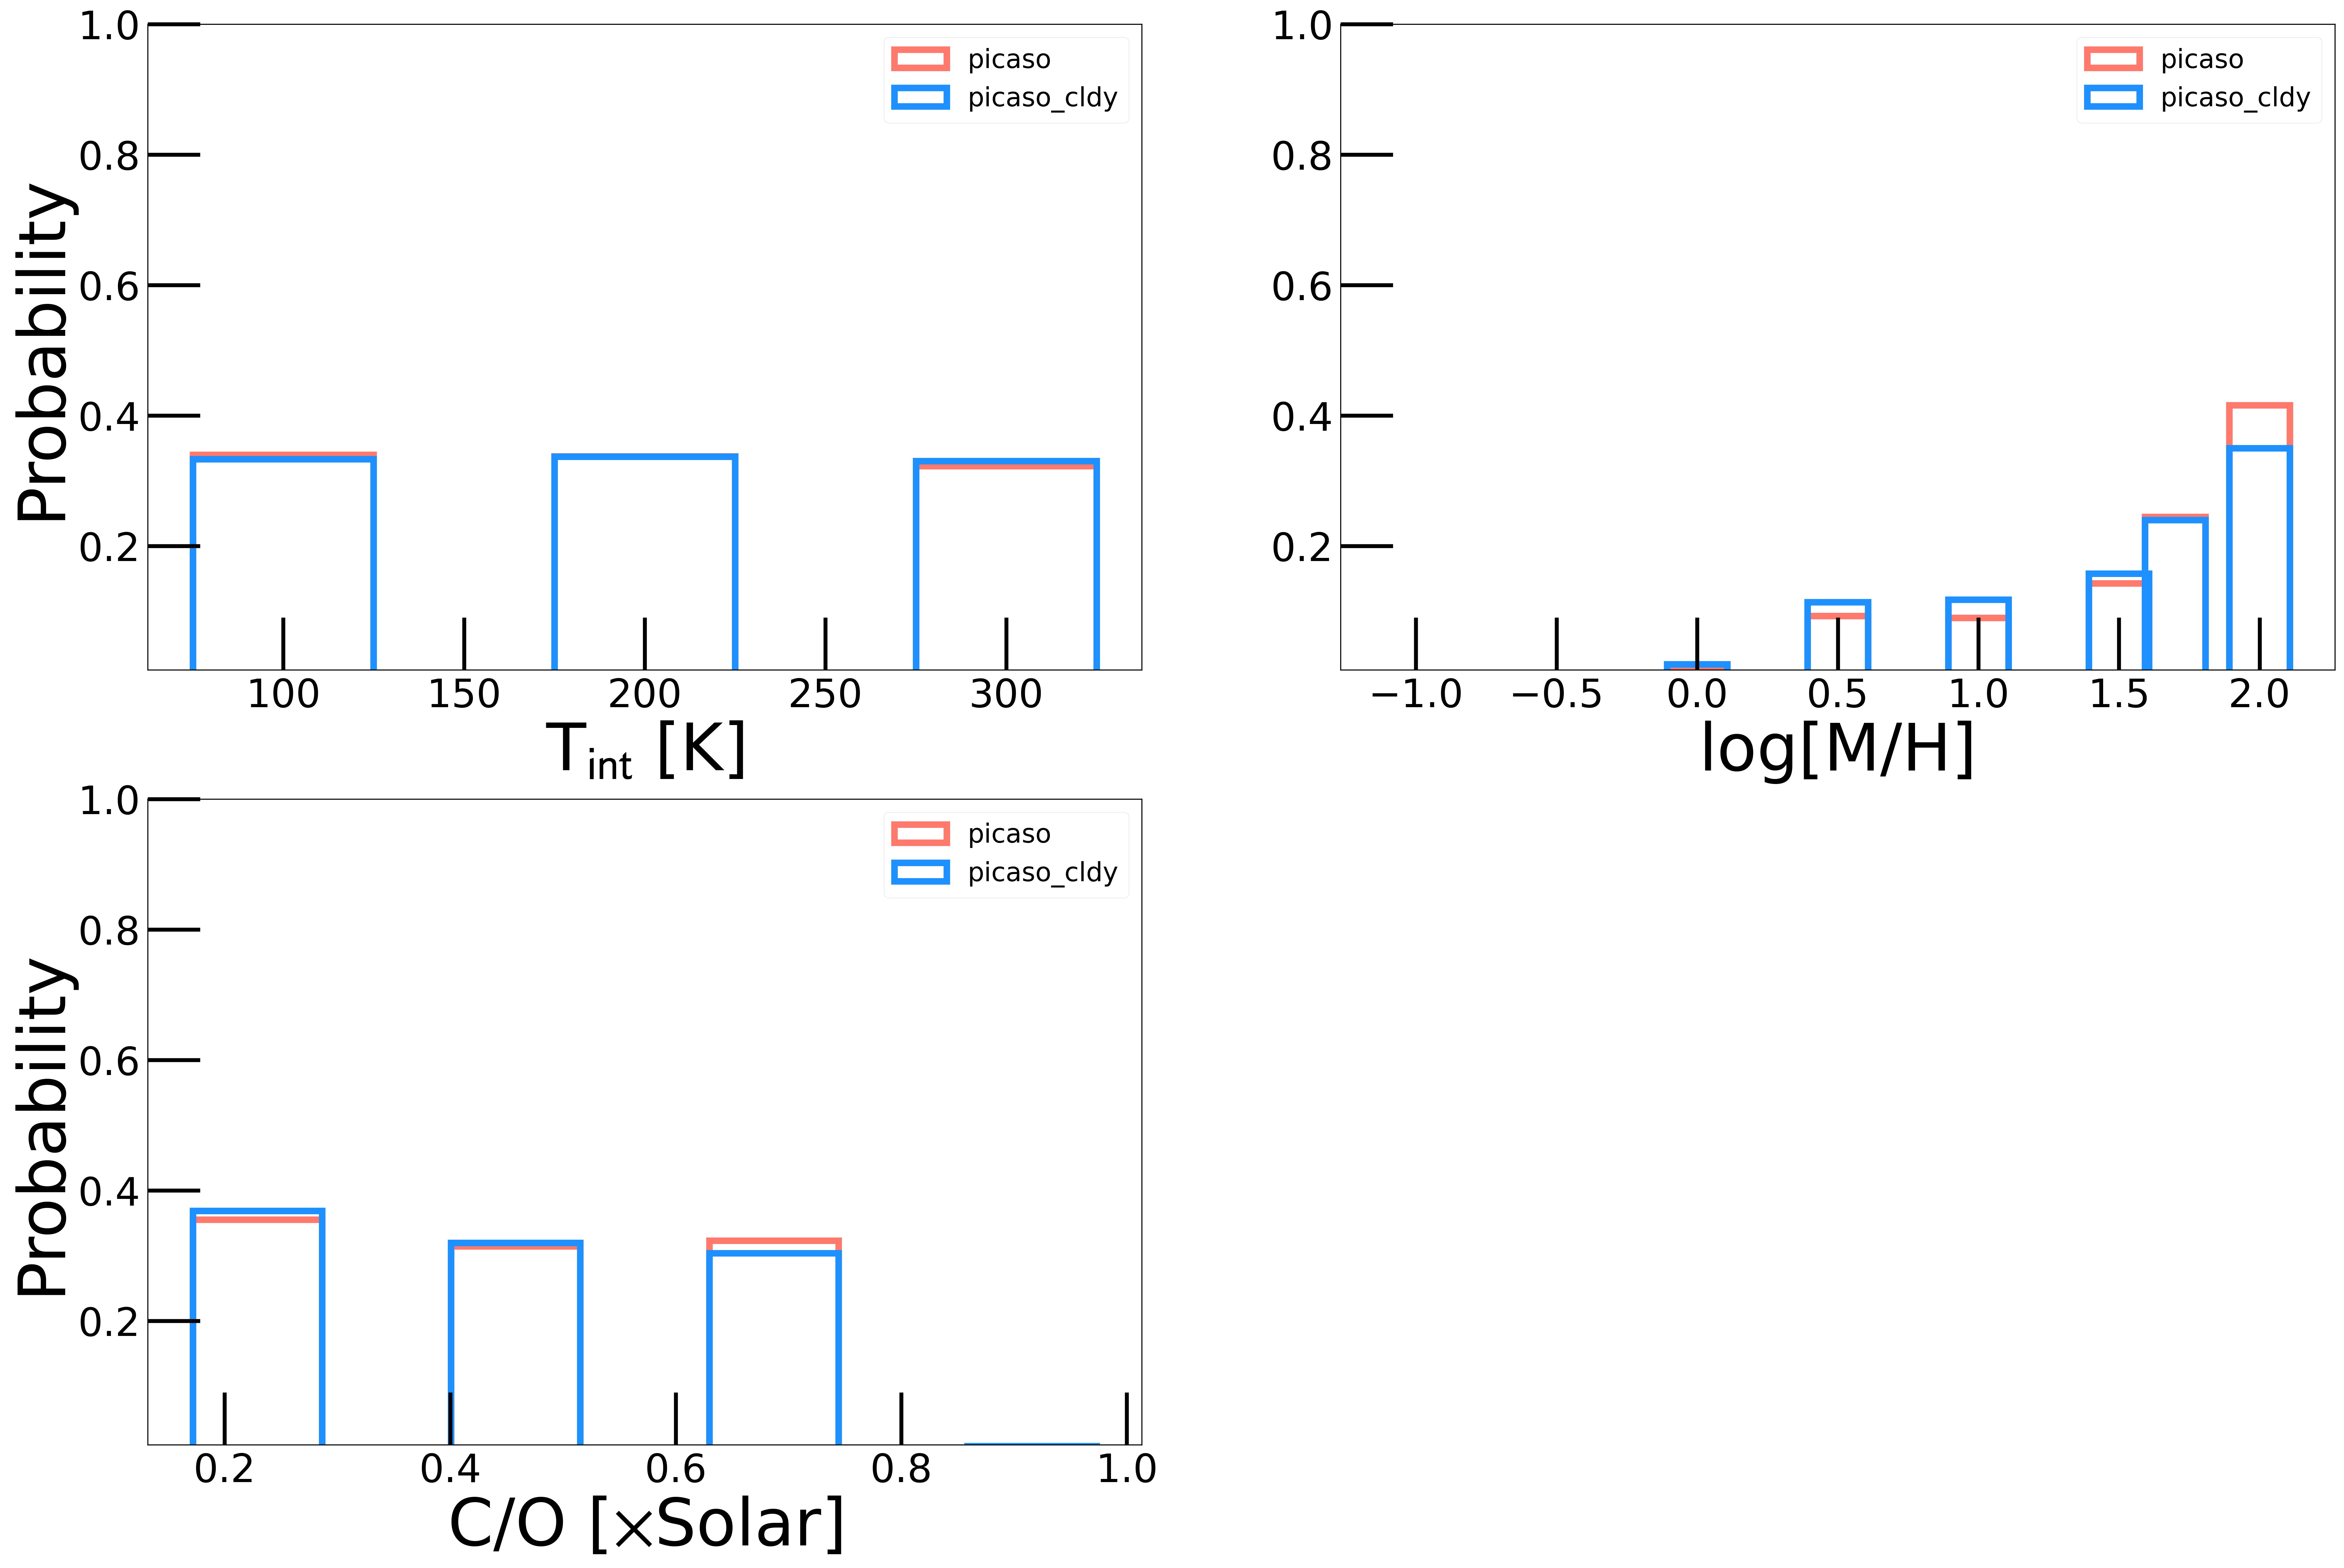

In [18]:
f,a=fitter.plot_posteriors('picaso','firefly',['tint','mh','cto'], 
               x_label_style={'tint':r"T$_{\rm int}$ [K]",
                              'mh':"log[M/H]", 'cto':r"C/O [$\times$Solar]"}, 
               x_axis_type={'tint':r"linear",
                              'mh':"log", 'cto':r"linear"})
f,a=fitter.plot_posteriors('picaso_cldy','firefly',['tint','mh','cto'], 
               x_label_style={'tint':r"T$_{\rm int}$ [K]",
                              'mh':"log[M/H]", 'cto':r"C/O [$\times$Solar]"}, 
               x_axis_type={'tint':r"linear",
                              'mh':"log", 'cto':r"linear"}, fig=f, ax=a)

In [19]:
#raw posteriors 
fitter.posteriors['picaso']

{'firefly': {'tint': (array([100., 200., 300.]),
   array([0.34005981, 0.33753454, 0.32240565])),
  'heat_redis': (array([0.4, 0.5]), array([0.51858745, 0.48141255])),
  'mh': (array([  0.1  ,   0.316,   1.   ,   3.162,  10.   ,  31.623,  50.119,
          100.   ]),
   array([2.38469162e-07, 1.43016085e-04, 1.44404612e-02, 9.26285901e-02,
          8.97678622e-02, 1.42654907e-01, 2.44656261e-01, 4.15708664e-01])),
  'cto': (array([0.229, 0.458, 0.687, 0.916]),
   array([0.35499352, 0.31440198, 0.32295263, 0.00765187]))}}

## Interpret Best Fit

In [27]:
#grab top model 
top_model_file  = np.array(out['list_of_files']['picaso']
        )[out['rank_order']['picaso']['firefly']][0]

xr_usr = jdi.xr.load_dataset(top_model_file)

opa = jdi.opannection()
case = jdi.input_xarray(xr_usr, opa)
og_atmo = jdi.copy.deepcopy(case.inputs['atmosphere']['profile'])
#if you need to rerun your spectrum 
#out = case.spectrum(opa,calculation='transmisson')

### See Contribution From Each Molecule

In [28]:
#atmo
w,f,l =[],[],[]
for iex in ['CH4','H2O','CO2',None]:
    case.atmosphere(df = og_atmo,exclude_mol=iex, delim_whitespace=True)
    df= case.spectrum(opa, full_output=True,calculation='transmission') #note the new last key 
    wno, rprs2  = df['wavenumber'] , df['transit_depth']
    wno, rprs2 = jdi.mean_regrid(wno, rprs2, R=150)
    w +=[wno]
    f+=[rprs2]
    if iex==None: 
        leg='all'
    else: 
        leg = f'No {iex}'
    l+=[leg]
jpi.show(jpi.spectrum(w,f,legend=l))